In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_config_map = {
    "pipeline_results_1node_8cpu.csv": "1-node-8cpu",
    "pipeline_results_1node_16cpu.csv": "1-node-16cpu",
    "pipeline_results_local.csv": "local",         
    "pipeline_results_2nodes_8+8cpu.csv": "2-node",   
    "pipeline_results_3nodes_8+8+8cpu.csv": "3-node"          
}

In [3]:

df_list = []
for file, label in file_config_map.items():
    try:
        temp_df = pd.read_csv(r"/workspaces/JetStream2_Benchmarking/results/{}".format(file))
        temp_df["config"] = label
        df_list.append(temp_df)
    except FileNotFoundError:
        print(f"{file} not found. Skipping...")

df_combined = pd.concat(df_list, ignore_index=True)

# Compute average metrics per configuration
metrics = ["total_time", "t_ingest", "t_bronze", "t_silver", "t_gold", 
           "cpu_bronze", "cpu_silver", "cpu_gold", 
           "mem_bronze", "mem_silver", "mem_gold",
           "write_bronze", "write_silver", "write_gold"]
df_avg = df_combined.groupby("config")[metrics].mean().reset_index()


In [4]:
df_combined

,run,total_time,t_ingest,cpu_ingest,mem_ingest,read_ingest,write_ingest,throughput_ingest,t_bronze,cpu_bronze,...,read_silver,write_silver,throughput_silver,t_gold,cpu_gold,mem_gold,read_gold,write_gold,throughput_gold,config
0,1,131.15,1.112469,NaN,NaN,0.0,0.0,0.0,85.041850,81.250000,...,1.093750,399.078125,17.762440,22.456277,91.7,33.7,0.039062,708.300781,31.543066,1-node-8cpu
1,2,101.07,0.011840,NaN,NaN,0.0,0.0,0.0,35.760892,72.630769,...,0.664062,919.109375,44.907982,44.810292,93.7,34.2,0.007812,1226.085938,27.361878,1-node-8cpu
2,3,128.24,0.023878,NaN,NaN,0.0,0.0,0.0,36.122715,73.880769,...,0.003906,466.339844,18.625229,67.053882,94.8,34.9,0.035156,1464.664062,21.843616,1-node-8cpu
3,4,157.98,0.017022,NaN,NaN,0.0,0.0,0.0,35.208150,72.430769,...,0.000000,622.933594,20.243987,91.984453,94.2,35.2,0.035156,2083.316406,22.648953,1-node-8cpu
4,5,181.04,0.031627,NaN,NaN,0.0,0.0,0.0,36.147172,71.503846,...,213.332031,784.855469,27.098095,108.023464,94.8,35.3,0.023438,2554.480469,23.647676,1-node-8cpu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26,603.14,0.023746,NaN,NaN,0.0,0.0,0.0,48.598615,52.300000,...,6063.027344,1010.238281,55.105740,426.159451,NaN,NaN,0.000000,0.000000,0.000000,3-node
146,27,585.58,0.029208,NaN,NaN,0.0,0.0,0.0,49.065155,51.980769,...,5988.390625,1051.535156,53.734418,405.471630,NaN,NaN,0.000000,0.000000,0.000000,3-node
147,28,563.66,0.030532,NaN,NaN,0.0,0.0,0.0,49.359891,51.992308,...,6645.609375,1034.601562,57.596868,380.919853,NaN,NaN,0.000000,0.000000,0.000000,3-node
148,29,539.11,0.033328,NaN,NaN,0.0,0.0,0.0,50.381493,51.088462,...,7260.160156,1000.167969,59.029691,348.761779,NaN,NaN,0.000000,0.000000,0.000000,3-node


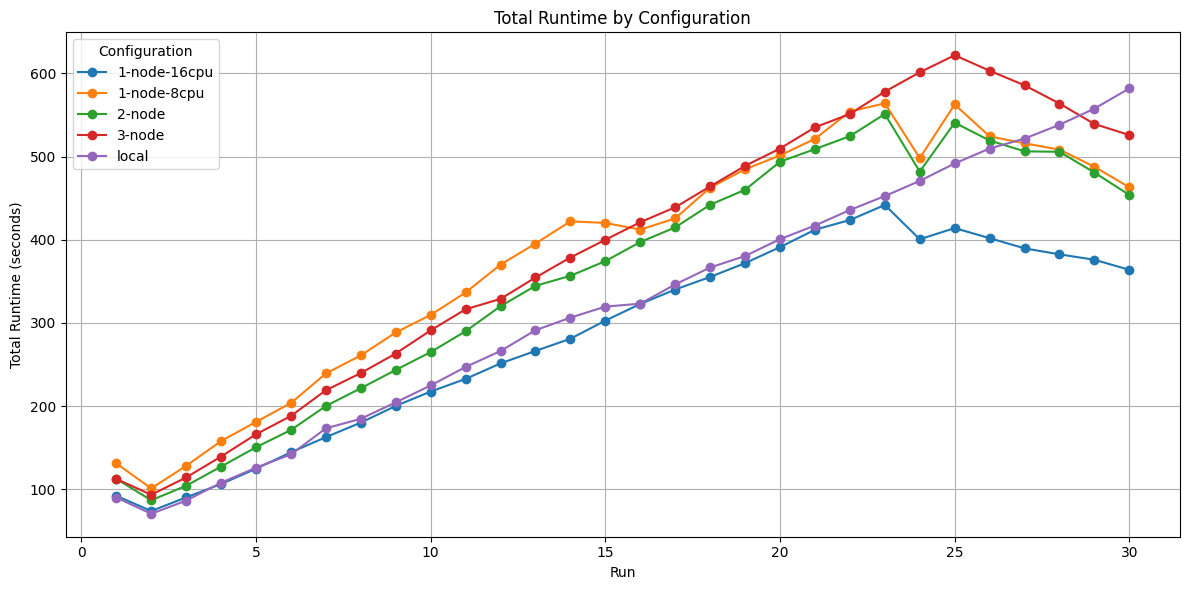

In [5]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["total_time"], marker='o', label=config)

plt.title("Total Runtime by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

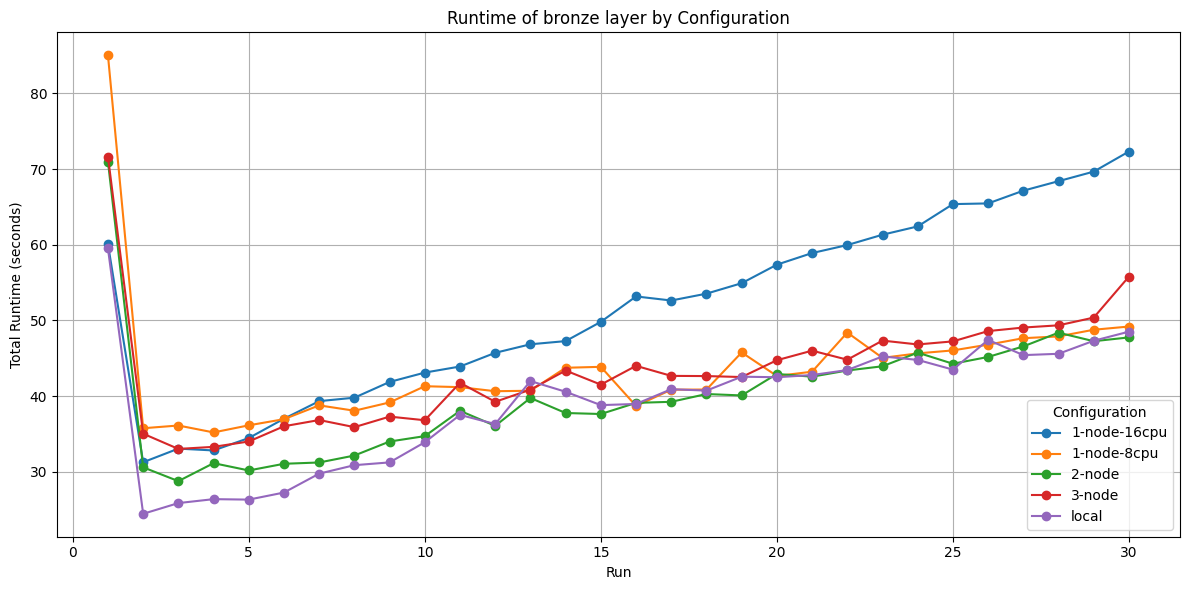

In [6]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["t_bronze"], marker='o', label=config)

plt.title("Runtime of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

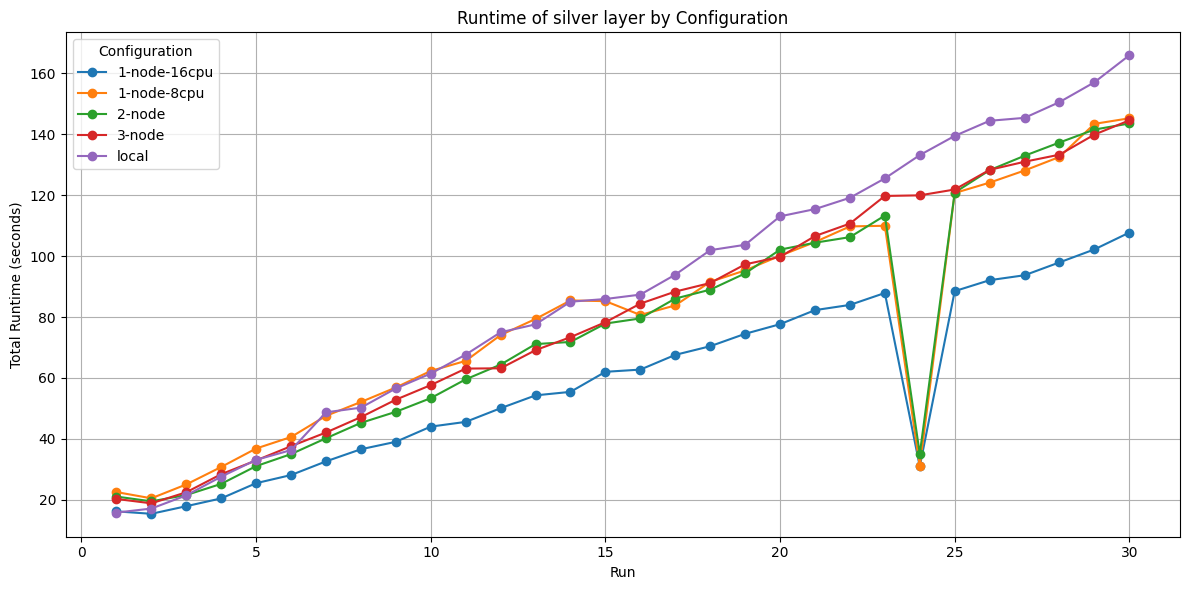

In [7]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["t_silver"], marker='o', label=config)

plt.title("Runtime of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

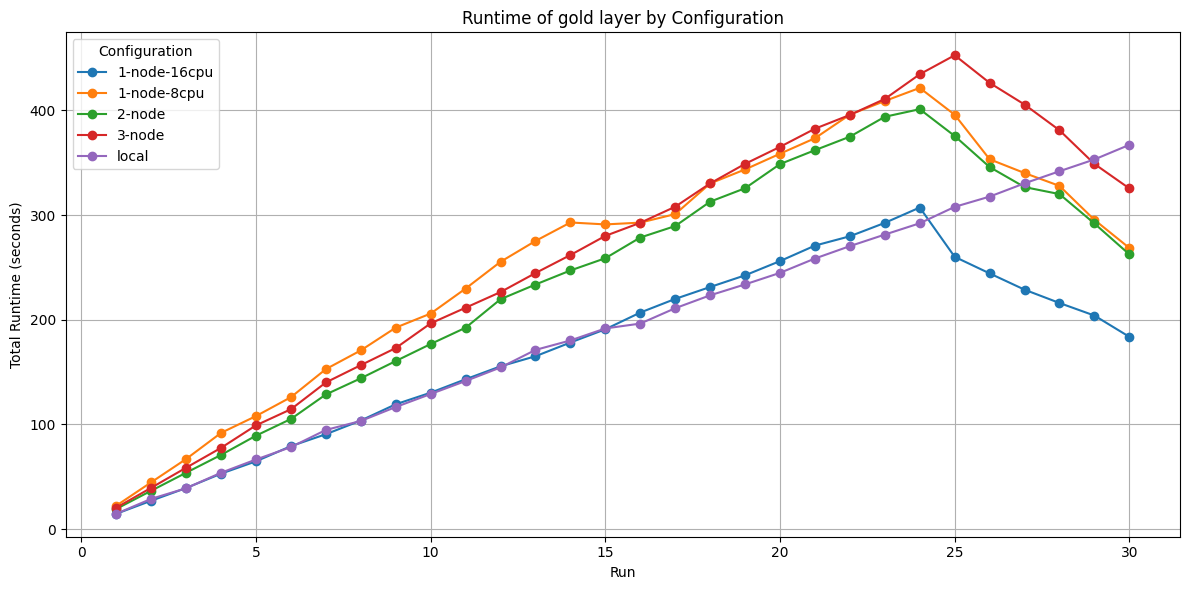

In [8]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["t_gold"], marker='o', label=config)

plt.title("Runtime of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Total Runtime (seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

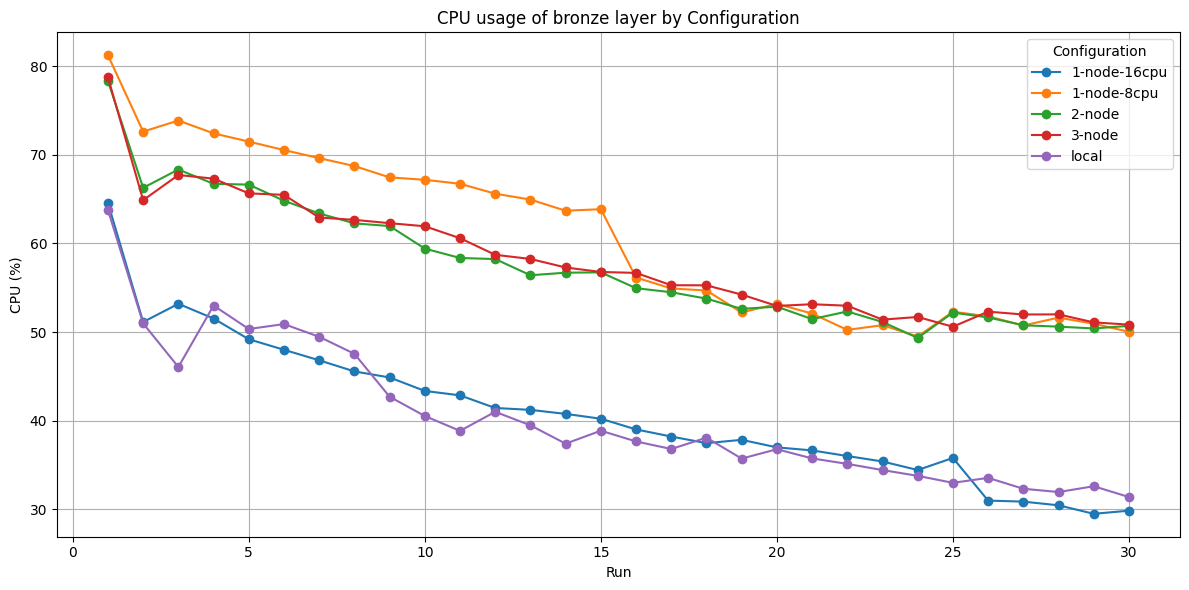

In [9]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["cpu_bronze"], marker='o', label=config)

plt.title("CPU usage of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("CPU (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

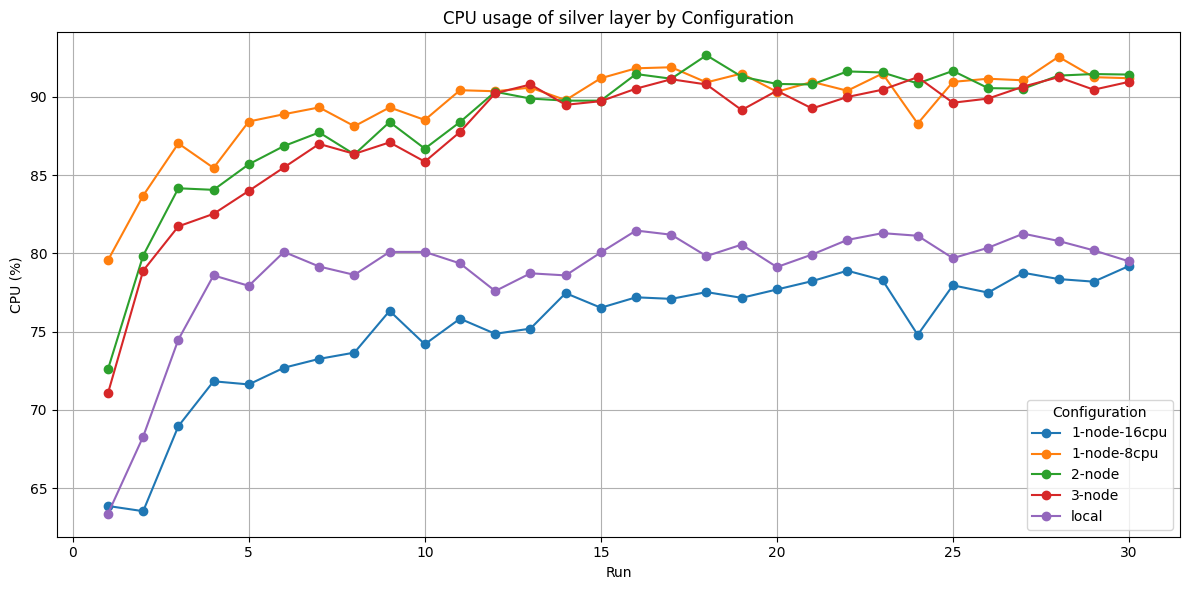

In [10]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["cpu_silver"], marker='o', label=config)

plt.title("CPU usage of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("CPU (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

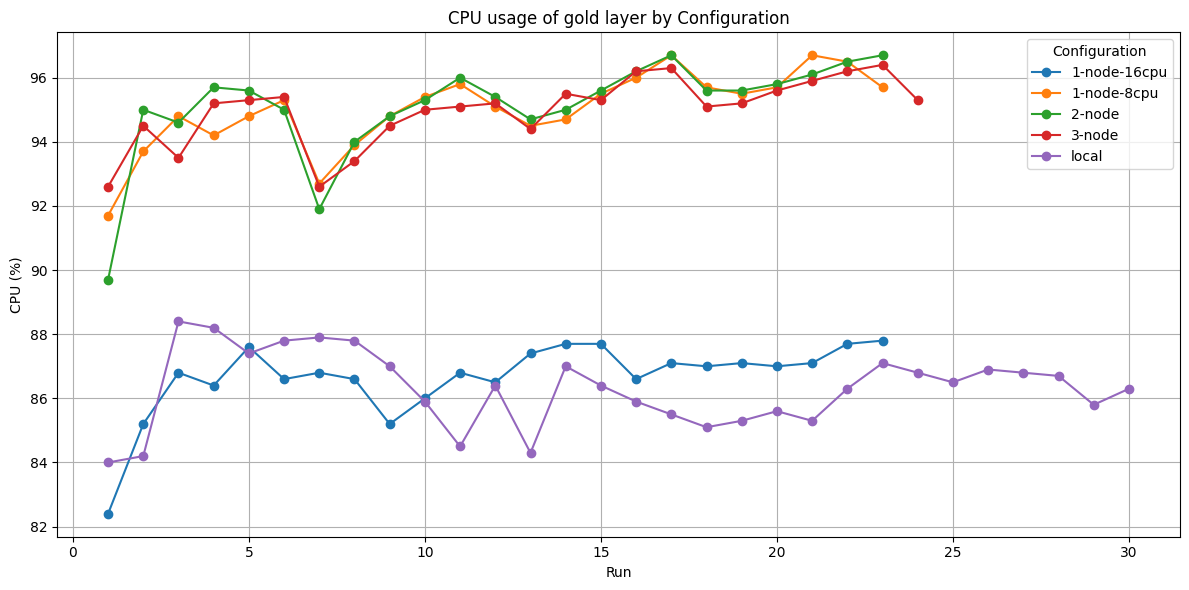

In [11]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["cpu_gold"], marker='o', label=config)

plt.title("CPU usage of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("CPU (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

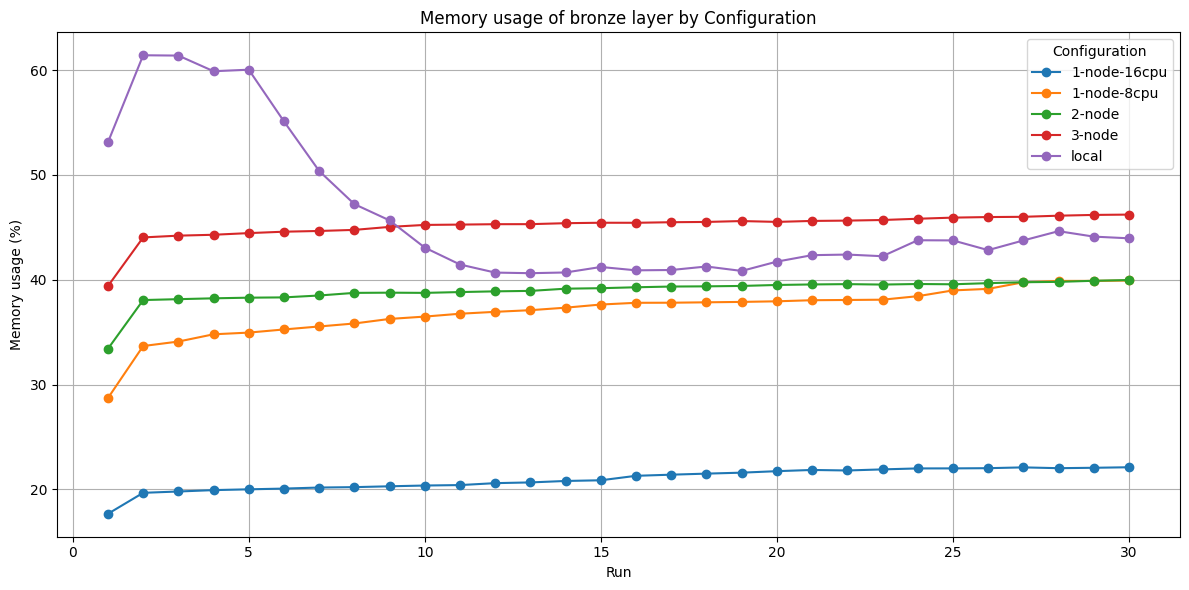

In [12]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["mem_bronze"], marker='o', label=config)

plt.title("Memory usage of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Memory usage (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

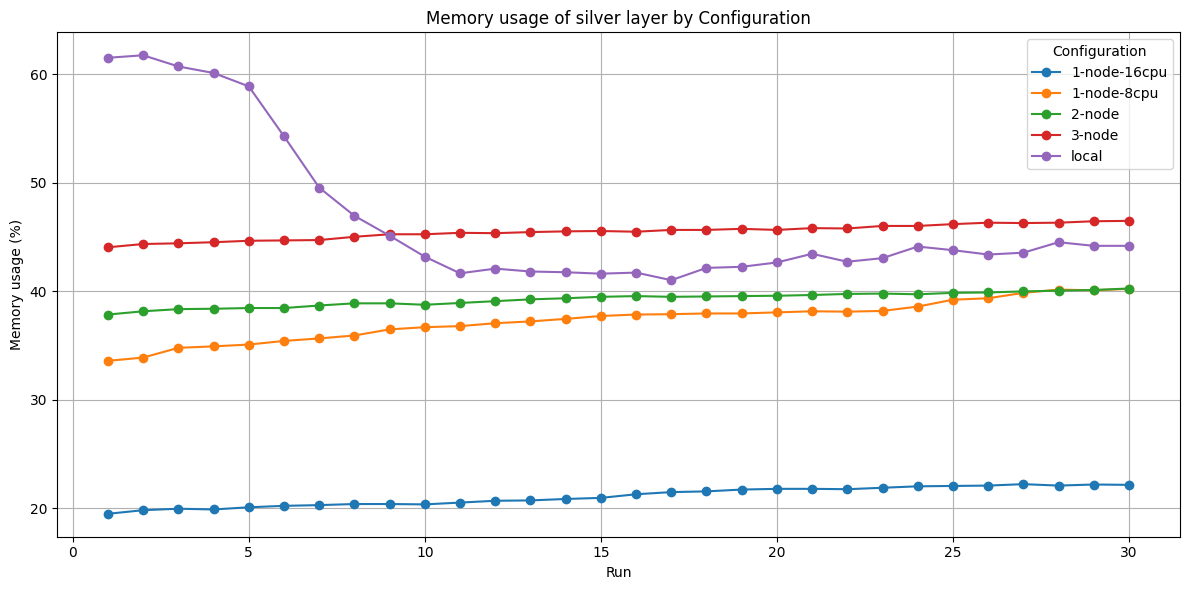

In [13]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["mem_silver"], marker='o', label=config)

plt.title("Memory usage of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Memory usage (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

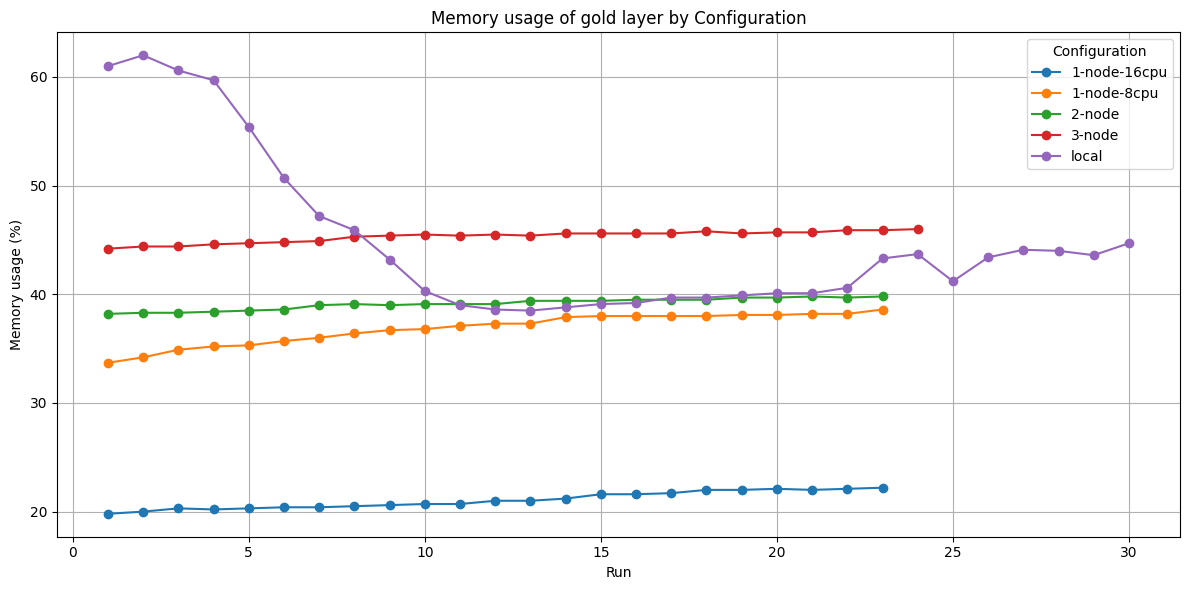

In [14]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["mem_gold"], marker='o', label=config)

plt.title("Memory usage of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Memory usage (%)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

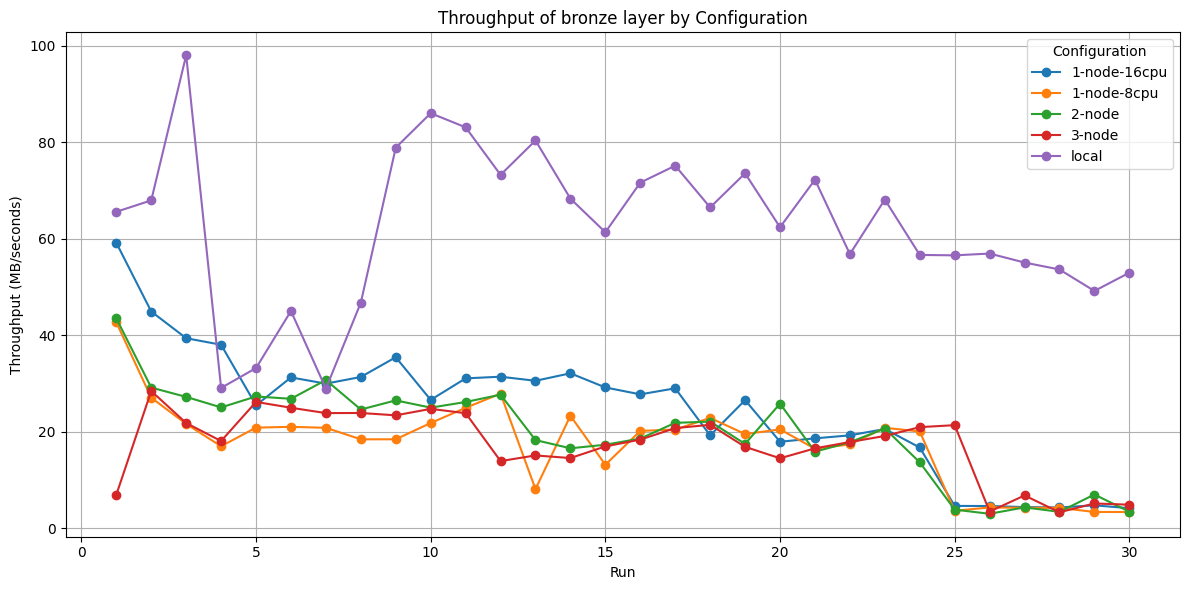

In [15]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["throughput_bronze"], marker='o', label=config)

plt.title("Throughput of bronze layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Throughput (MB/seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

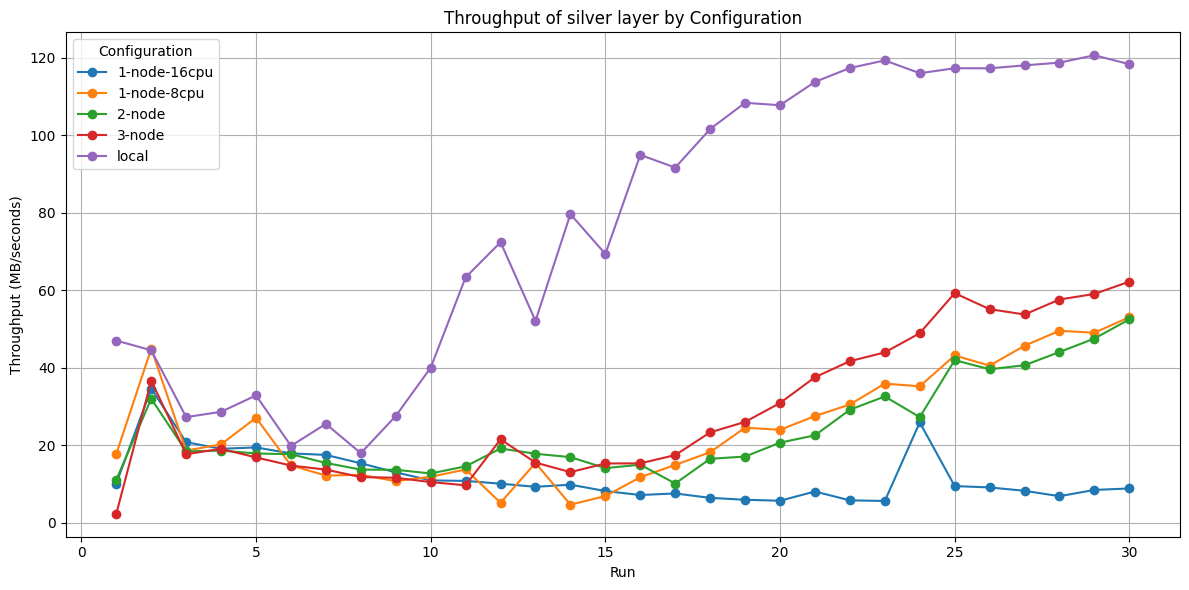

In [16]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["throughput_silver"], marker='o', label=config)

plt.title("Throughput of silver layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Throughput (MB/seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

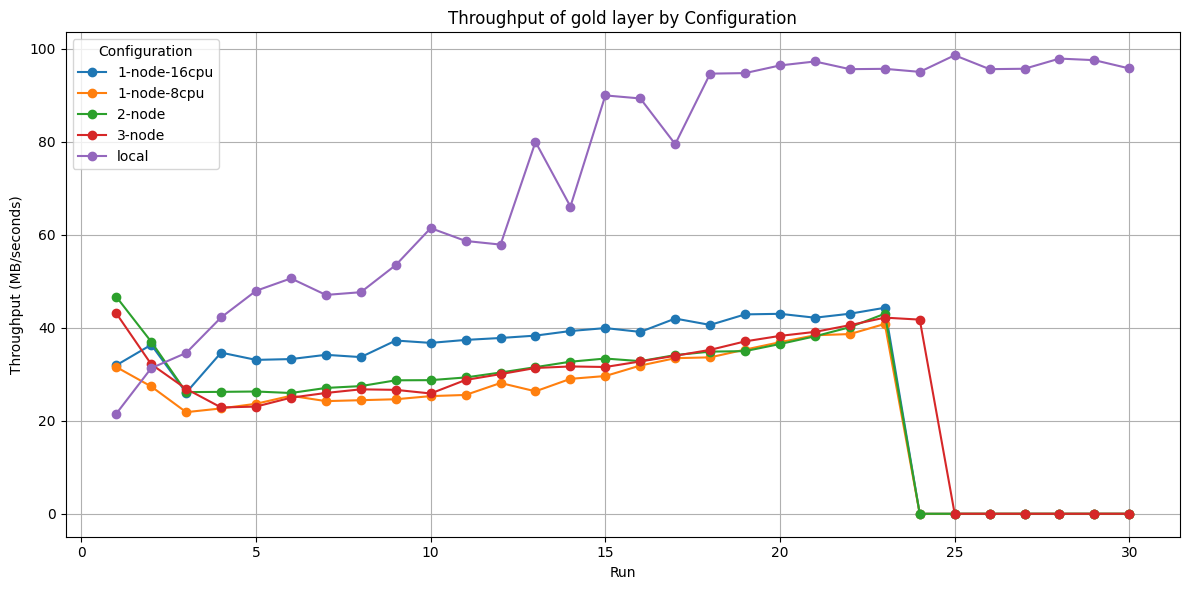

In [17]:
plt.figure(figsize=(12, 6))

for config, group in df_combined.groupby("config"):
    plt.plot(group["run"], group["throughput_gold"], marker='o', label=config)

plt.title("Throughput of gold layer by Configuration")
plt.xlabel("Run")
plt.ylabel("Throughput (MB/seconds)")
plt.legend(title="Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

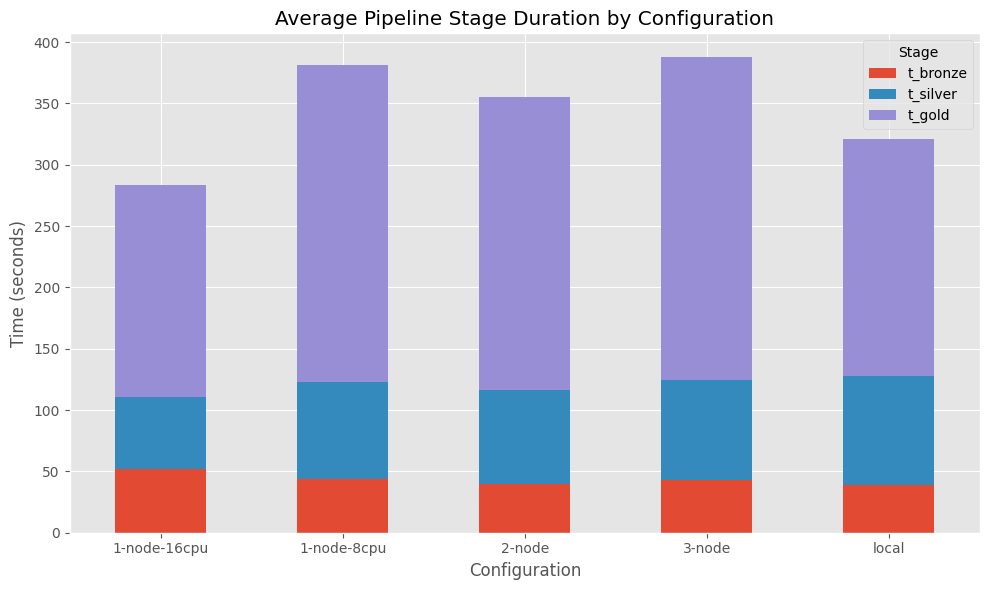

In [18]:
plt.style.use('ggplot')
stage_columns = ["t_bronze", "t_silver", "t_gold"]
df_avg.set_index("config")[stage_columns].plot(
    kind="bar", 
    stacked=True,
    figsize=(10, 6)
)

plt.title("Average Pipeline Stage Duration by Configuration")
plt.ylabel("Time (seconds)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

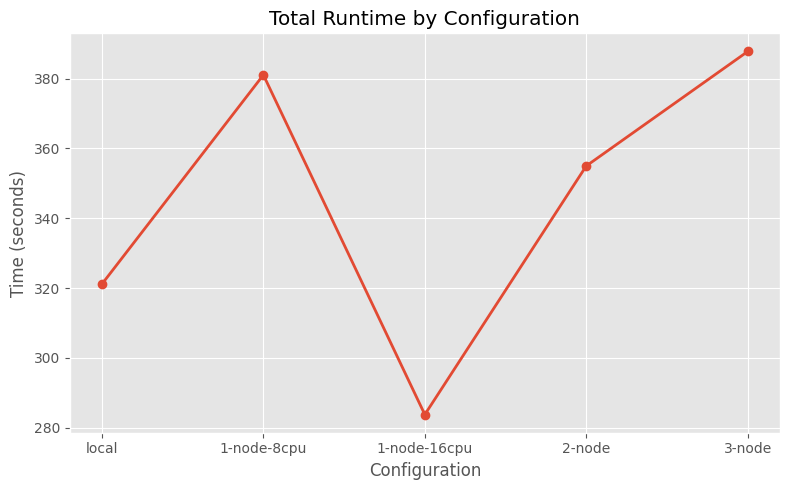

In [19]:
config_order = ["local", "1-node-8cpu", "1-node-16cpu", "2-node", "3-node"]
df_avg["config"] = pd.Categorical(df_avg["config"], categories=config_order, ordered=True)
df_avg = df_avg.sort_values("config")

# Plot total runtime as a line chart
plt.figure(figsize=(8, 5))
plt.plot(df_avg["config"], df_avg["total_time"], marker='o', linewidth=2)

plt.title("Total Runtime by Configuration")
plt.ylabel("Time (seconds)")
plt.xlabel("Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

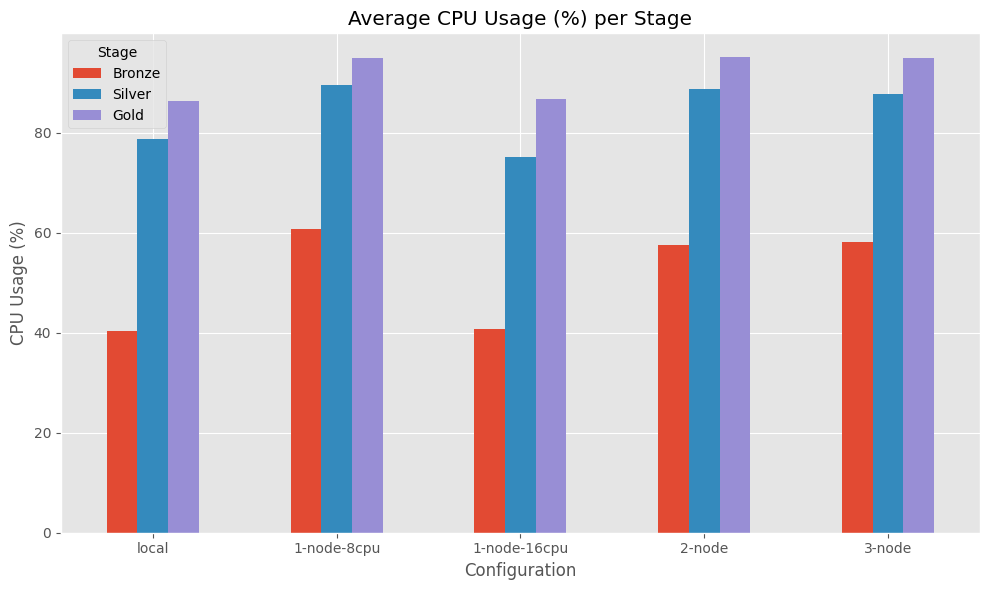

In [20]:
cpu_cols = ["cpu_bronze", "cpu_silver", "cpu_gold"]
df_avg_cpu = df_avg[["config"] + cpu_cols].set_index("config")

# Rename columns for prettier labels
df_avg_cpu.columns = ["Bronze", "Silver", "Gold"]

# Plot
df_avg_cpu.plot(kind="bar", figsize=(10, 6))
plt.title("Average CPU Usage (%) per Stage")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

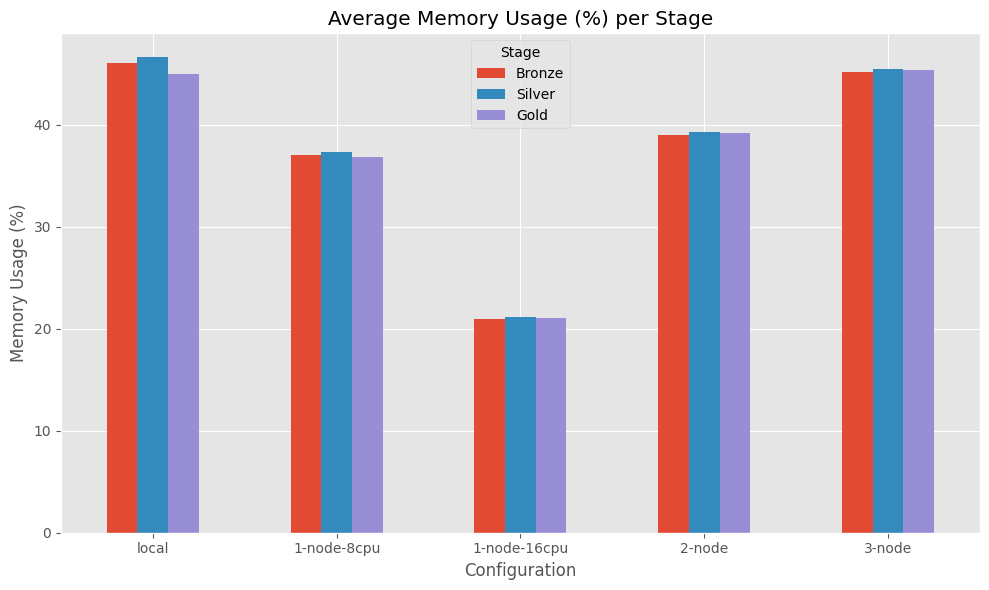

In [21]:
mem_cols = ["mem_bronze", "mem_silver", "mem_gold"]
df_avg_mem = df_avg[["config"] + mem_cols].set_index("config")
df_avg_mem.columns = ["Bronze", "Silver", "Gold"]

df_avg_mem.plot(kind="bar", figsize=(10, 6))
plt.title("Average Memory Usage (%) per Stage")
plt.ylabel("Memory Usage (%)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

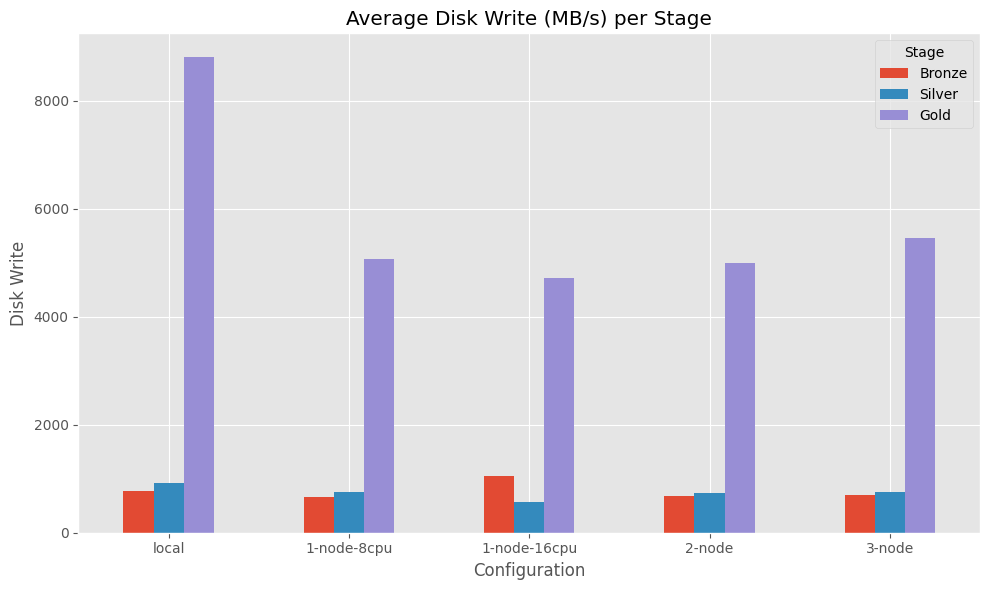

In [22]:
write_cols = ["write_bronze", "write_silver", "write_gold"]
df_avg_write = df_avg[["config"] + write_cols].set_index("config")
df_avg_write.columns = ["Bronze", "Silver", "Gold"]

df_avg_write.plot(kind="bar", figsize=(10, 6))
plt.title("Average Disk Write (MB/s) per Stage")
plt.ylabel("Disk Write")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()